<a href="https://colab.research.google.com/github/gisynw/ssj-302/blob/main/docs/Lectures/Week11_CreatingCustom_Tools/scripts\Week11_custom_tool.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" style="height: 30px;"/>
</a>
&nbsp &nbsp
<a href="./Week11_CreatingCustom_Tools/scripts\Week11_custom_tool.ipynb" target="_blank"> 
  <img src="https://img.icons8.com/?size=100&id=108635&format=png&color=000000" alt="Download" style="height: 40px;"/>
 </a>

<center>
    <h2 style="color:  #526cfe; font-family: Arial, sans-serif; font-size: 32px; padding: 10px;">
        Week 13: Building Custom Tools in ArcGIS Pro for Streamlined GIS Workflows
    </h2>
</center>

## Introduction to Custom Tools in ArcGIS Pro

- Objective: 

  - The power and flexibility of creating custom tools in ArcGIS Pro for automating repetitive tasks and simplifying complex analyses.
    - Automation of Repetitive Tasks: Custom tools allow you to automate tasks that you might otherwise need to repeat manually. 
    - Streamlined Workflows: Custom tools can simplify complex workflows by combining multiple steps into a single operation.
    - Adaptability to Unique Problems: Each GIS project has unique needs. Custom tools allow you to address these specific requirements that might not be covered by standard ArcGIS tools.

## Landsat 8 Introduction

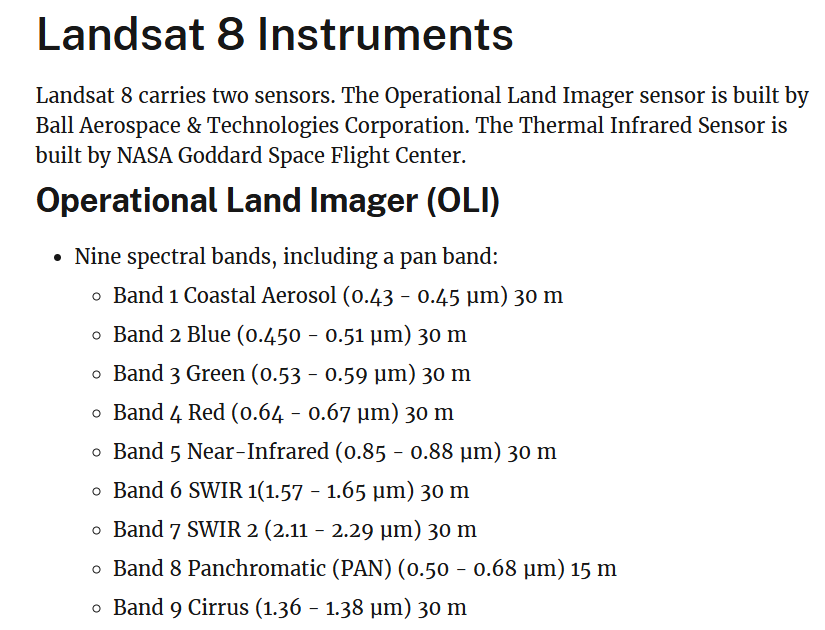

## Goals

### Landsat Normalized Difference Vegetation Index (NDVI)

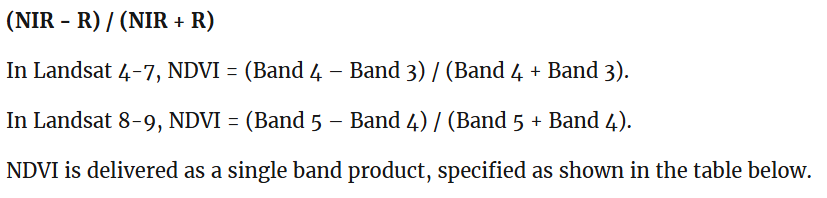

### Normalized Difference Water Index (NDWI)

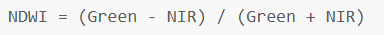

## Step-by-Step Guide: Building a Landsat Index Calculation Tool

### 1. Create .py fle

- Open VS code
- Create a .py file

### 2. Import Libraries and Set up Parameters

- Import the necessary libraries: arcpy for GIS processing, Spatial Analyst (for raster operations), and numpy for array calculations.

```
import arcpy
from arcpy.sa import *
from arcpy.sa import Raster
import os
```

### 3. Define the parameters
#### 3.1 Input Parameter (Bands)

Uinsg [GetParameterAsText](https://pro.arcgis.com/en/pro-app/latest/arcpy/functions/getparameterastext.htm) to access the input data and export data

- Input_bands: Select bands as the input parameter.

```
red = Raster(arcpy.GetParameterAsText(0))
nir = Raster(arcpy.GetParameterAsText(1))
green = Raster(arcpy.GetParameterAsText(2))
```

#### 3.2 Input Index and Output

```
index_type = arcpy.GetParameterAsText(3)
output_folder = arcpy.GetParameterAsText(4)
output_name = arcpy.GetParameterAsText(5)
```

#### 3.3 Calculate Landsat Index

```
if index_type == "NDVI":
    result = (nir - red) / (nir + red)
elif index_type == "NDWI":
    result = (green - nir) / (green + nir)
else:
    arcpy.AddError("Invalid index type selected.")
    raise ValueError("Invalid index type")
```

#### 3.4 Save Output 

##### 3.4.1 Ensure output folder exists and file extension is .tif
```
if not os.path.exists(output_folder):
    arcpy.AddError("The selected output folder does not exist.")
    raise arcpy.ExecuteError

if not output_name.lower().endswith(".tif"):
    output_name += ".tif"
```

##### 3.4.2 Full output path
```
output_path = os.path.join(output_folder, output_name)
```

##### 3.4.3 Save and notify
```
result.save(output_path)

arcpy.AddMessage(f"{index_type} saved at: {output_path}")
```

3.5 Save .py file

Click Save the file as 

## Create custom tool in ArcGIS Pro
### General
In the Catalog pane, expand the Toolboxes section, there is a toolbox end with .atbx. 

Right click .abtx, and select New > Script

On the general tab, enter the following information: Name, Label, and Toolbox

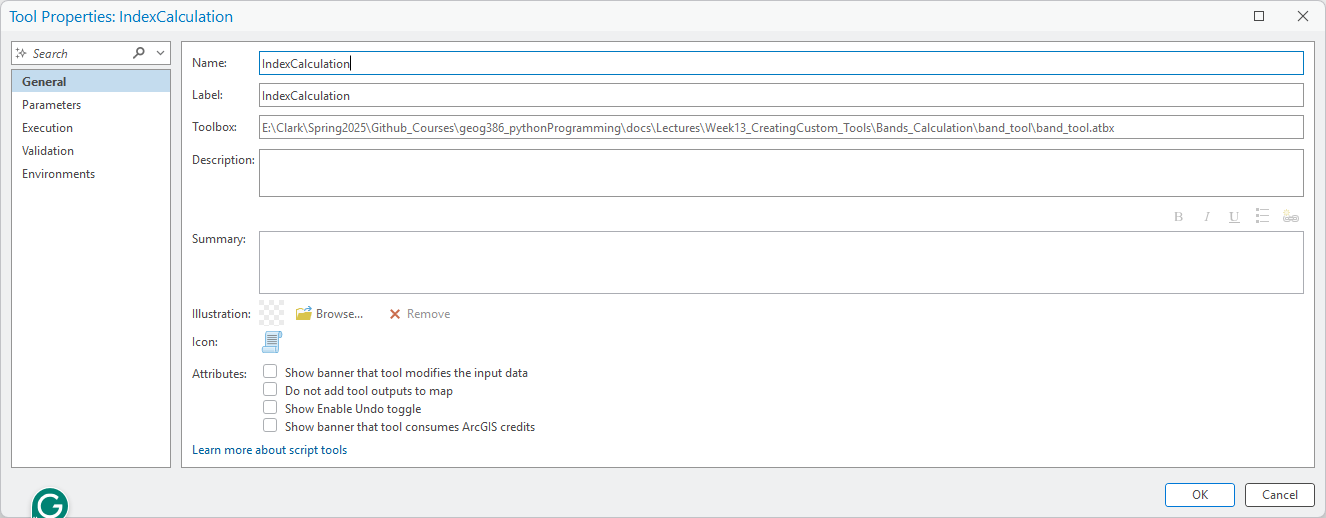
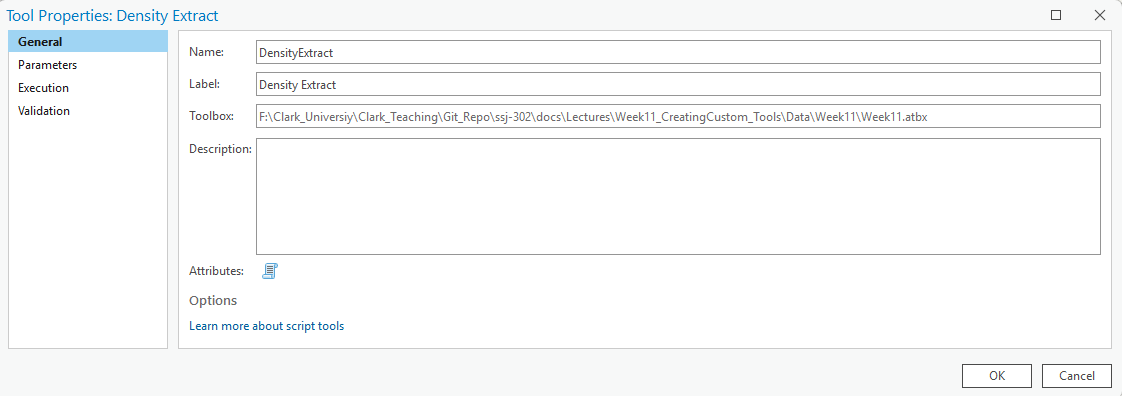

### Parameter

Each of the parameter is correspond to an parameter in the script. 

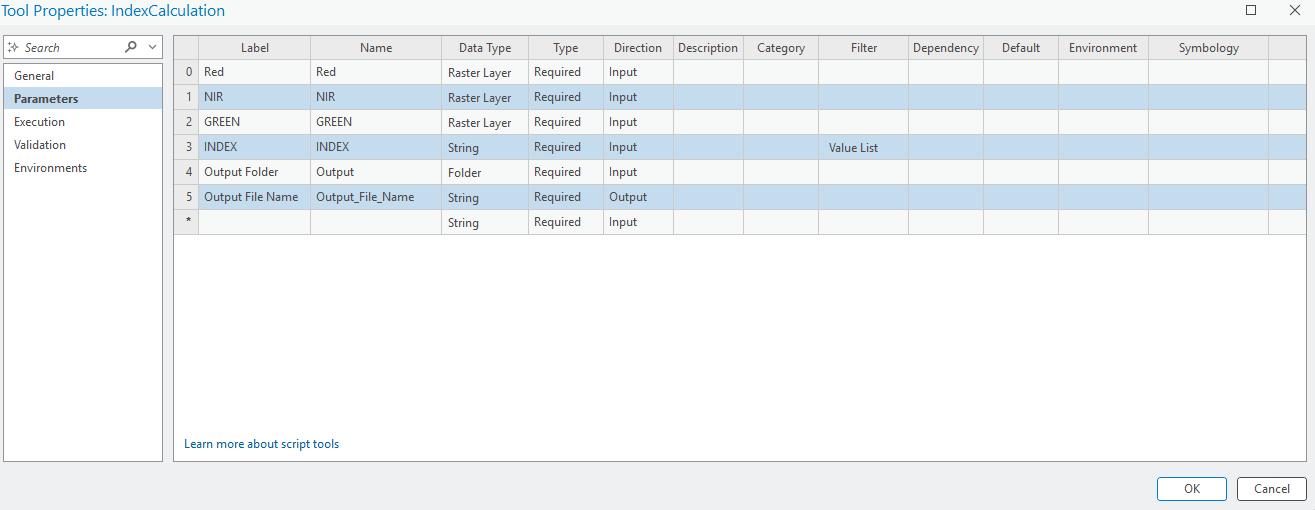
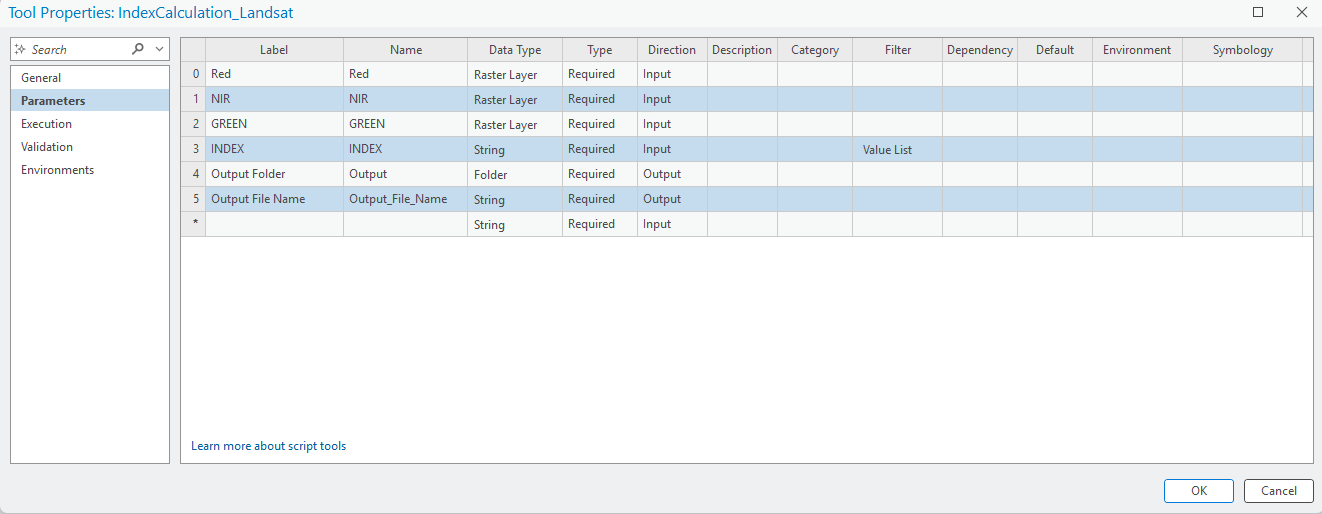
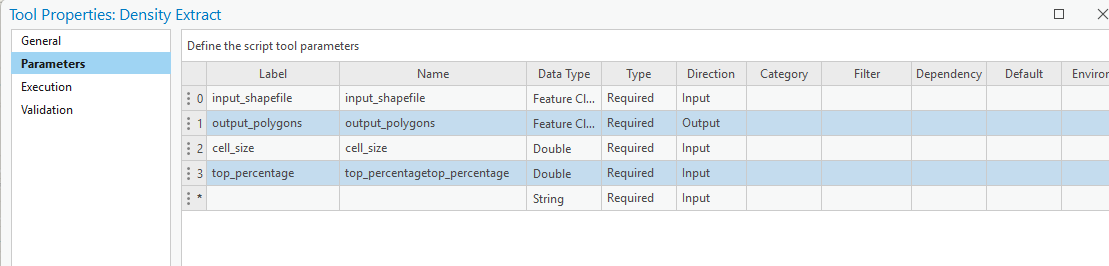

### Execution

Click the Execution tab, the window first show some boilerplate code. You can write the script using this interface or you can write the code using an external development environment like IDLE, PyCharm or VS Code. 

Then import the code to the script tool. 

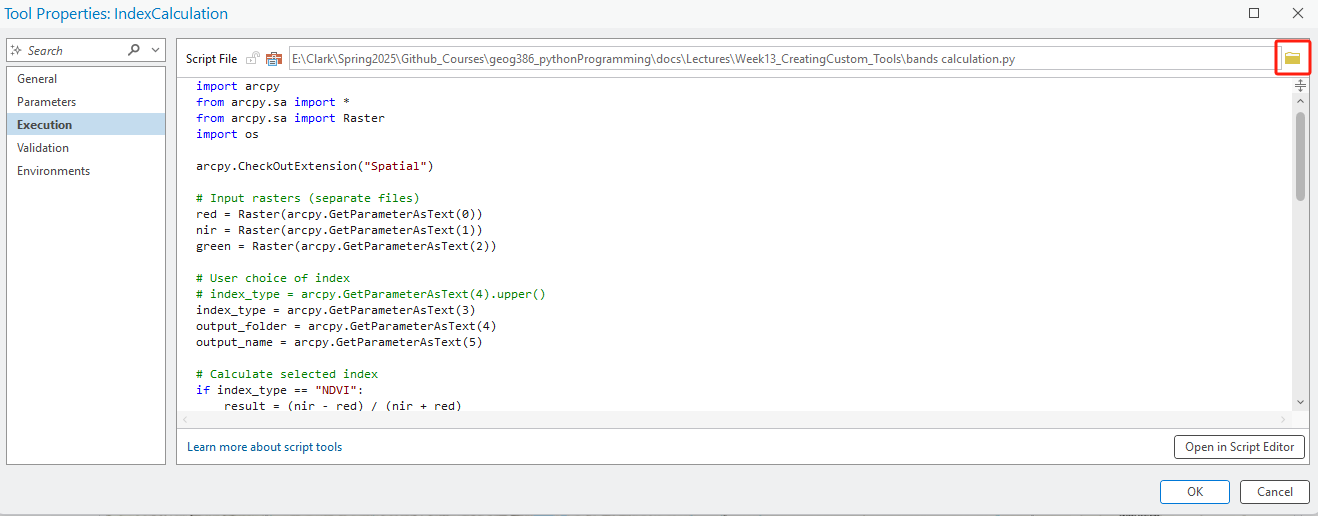
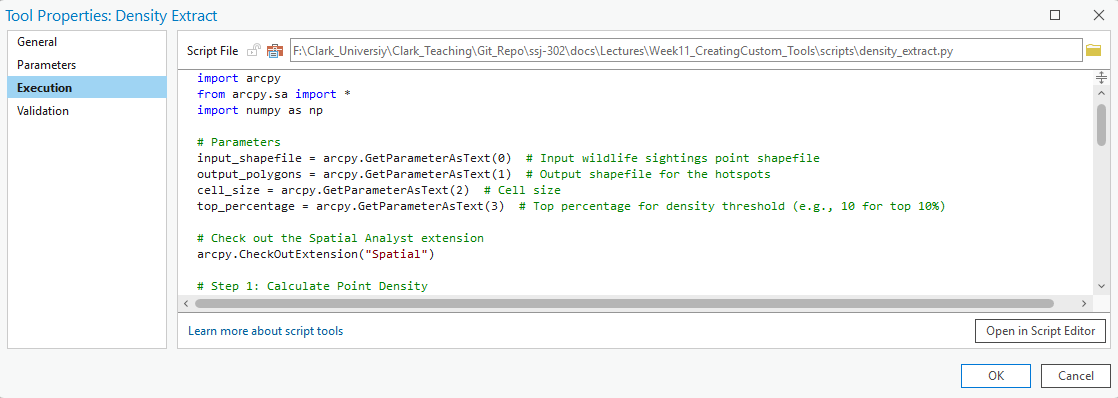

## Run the Script Tool

Double click the tool and display the interface for the custom script tool

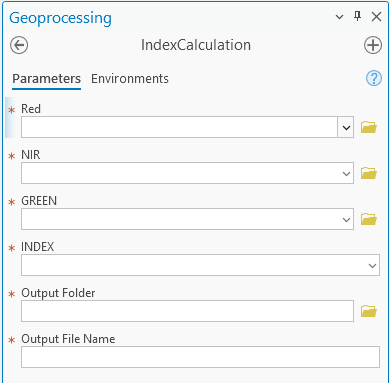

## Result

### NDVI

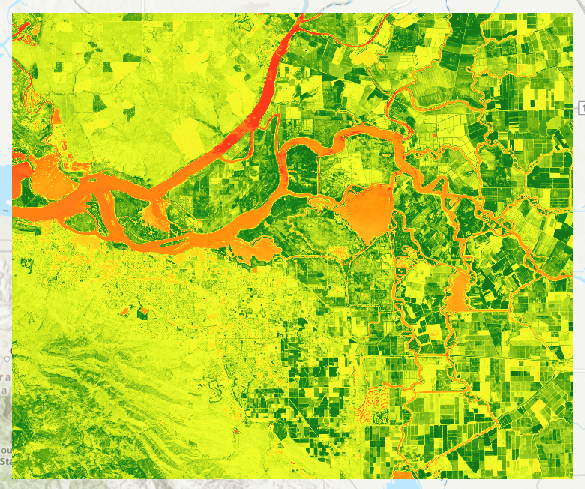
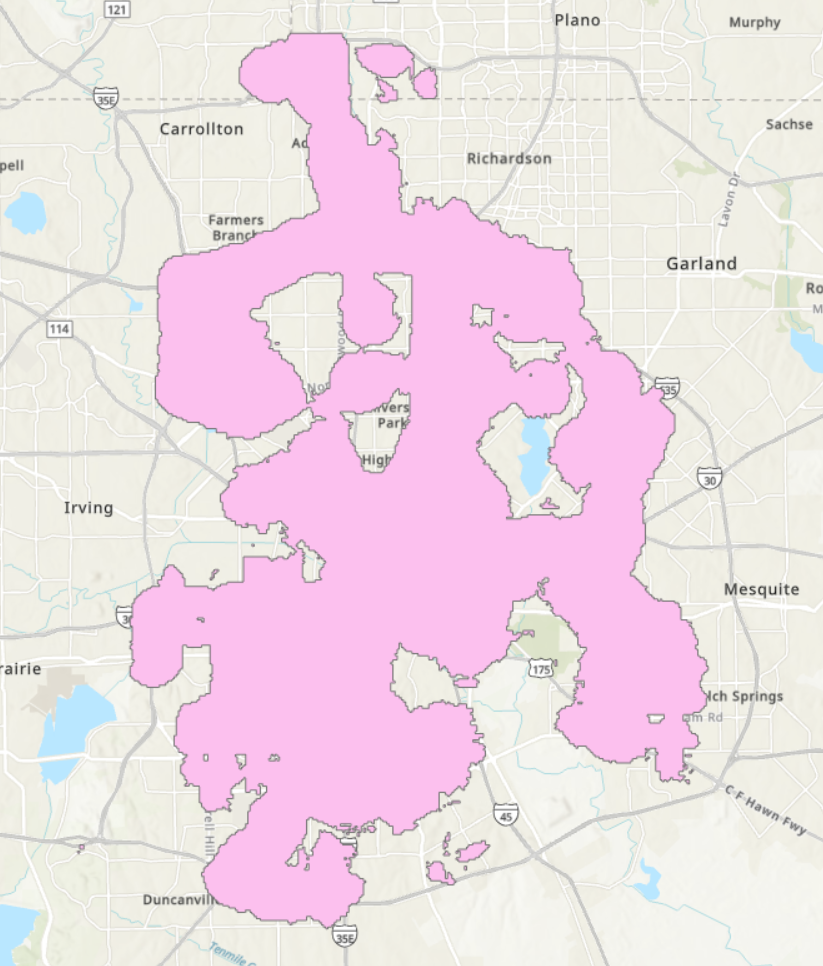

### NDWI

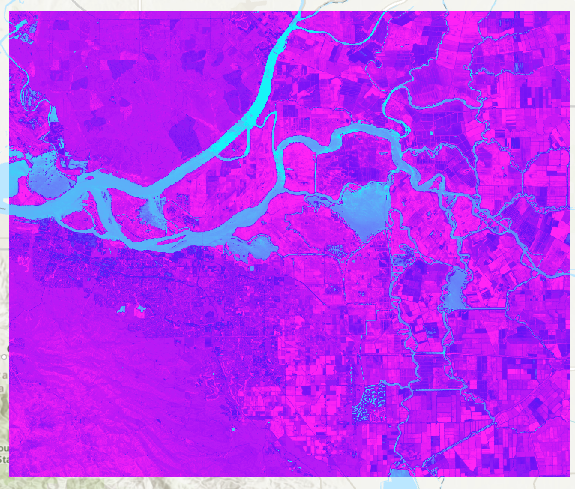